<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II

#  Trabajo semanal 2
#### Autor: Torres Alejandro
#### Legajo: 141884-1


## Circuito

<img src="./circuito.png" align="left" width="700" /> 


## Consignas de la actividad:

👉  Hallar la transferencia T=VoVi en función de ωo y Q

👉  Obtener el valor de los componentes del circuito de forma tal que ωo=1 y Q=3

👉  Ajustar el valor de R1 de forma tal que |T(0)|=20dB

### Bonus:

+10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.

+10 🎓 Calcular las sensibilidades  SωoC, SQR2 y SQR3

+10 🤯 Recalcular los valores de la red para que cumpla con una transferencia Butterworth.

+10  🎸 Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).

+10  ⚽️ Simulación circuital de todos los experimentos.

+10  🍺 Presentación en jupyter notebook

## Desarrollo manuscrito

In [1]:
from IPython.display import IFrame
IFrame("./semanal2_torres.pdf", width=1000, height=1000)

### Cálculo de transferencia

$$
\begin{align}
&V_a(Y_2+Y_c)+V_oY_3=V_iY_1 \\
&V_aY_3=V_bY_c \longrightarrow V_a=V_b\frac{Y_c}{Y_3}\longrightarrow V_a=V_o\frac{Y_c}{Y_3}\\
&V_bY_4=V_oY_4 \longrightarrow V_o=V_b \\ \\
&V_o[\frac{Y_cY_2+Y²_c}{Y3}+Y_3]=V_iY_1 \\
&V_o[\frac{Y_cY_2+Y²_c+Y_3}{Y3}]=V_iY_1 \\
&\frac{V_o}{V_i}=\frac{Y_3Y_1}{Y²_c+Y_cY_2+Y²_3}\longrightarrow 
\frac{V_o}{V_i}=\frac{\frac{1}{R_3R_1}}{s²C²+s\frac{C}{R_2}+\frac{1}{R_3²}}\\
&\frac{V_o}{V_i}=\frac{1}{C²R_3R_1} \frac{1}{s²+s\frac{1}{CR_2}+\frac{1}{C²R_3²}}\\
&\frac{V_o}{V_i}=\frac{R_3}{R_1} \frac{\frac{1}{C²R_3²}}{s²+s\frac{1}{CR_2}+\frac{1}{C²R_3²}}\\
\end{align}
$$


## Simulación Simbólica

In [2]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

In [3]:
Vi, Vo, Va, Vb     = sp.symbols("Vi, Vo, Va,Vb ")
Y1, Y2, Y3, Y4, Yc, R1, R2, R3, R4, C = sp.symbols("Y1, Y2, Y3, Y4, Yc, R1, R2, R3, R4, C")

In [4]:
aa = sp.solve([ 
                Va*(Y2+Yc)+Vo*Y3-Vi*Y1, 
                Va*Y3 -Vb*Yc,
                Vb*Y4-Vo*Y4
                ], 
                [Vo, Va, Vi])


In [5]:
aa

{Vo: Vb, Va: Vb*Yc/Y3, Vi: (Vb*Y2*Yc + Vb*Y3**2 + Vb*Yc**2)/(Y1*Y3)}

In [6]:
transf_func = aa[Vo]/aa[Vi]

transf_func

Vb*Y1*Y3/(Vb*Y2*Yc + Vb*Y3**2 + Vb*Yc**2)

In [7]:
transf_func = sp.simplify(transf_func)
transf_func

Y1*Y3/(Y2*Yc + Y3**2 + Yc**2)

In [8]:
tf7a = transf_func.subs(Y1, 1/R1)
tf7a = tf7a.subs(Y3, 1/R3)
tf7a = tf7a.subs(Y2, 1/R2)
tf7a = tf7a.subs(Yc, s*C)
tf7a = tf7a.subs(Y4, 1/R4)

tf7a

1/(R1*R3*(C**2*s**2 + C*s/R2 + R3**(-2)))

In [9]:
sp.expand(tf7a)

1/(C**2*R1*R3*s**2 + C*R1*R3*s/R2 + R1/R3)

In [10]:
sp.simplify(sp.expand(tf7a))

R2*R3/(R1*(C**2*R2*R3**2*s**2 + C*R3**2*s + R2))

In [11]:
num, den =sp.fraction(sp.simplify(sp.expand(tf7a))) 

In [12]:
num

R2*R3

In [13]:
den

R1*(C**2*R2*R3**2*s**2 + C*R3**2*s + R2)

In [14]:
num = sp.poly(num,s)
den = sp.poly(den,s)
k = num.LC()/den.LC()
k

1/(C**2*R1*R3)

In [15]:
den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf7a_final = sp.Mul(k,num/den, evaluate=False)
tf7a_final

(1/(C**2*R1*R3))*(R2*R3/(C**2*R1*R2*R3**2*s**2 + C*R1*R3**2*s + R1*R2))

## Simulaciónes

### Simulación en python


In [16]:
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [17]:

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [18]:
# Definimos los parámetros de la simulación
w0 = 1
K  = 10
Q  = 3
R3 = 1

R1 = R3/K
R2 = Q * R3
C  = 1 / (w0*R3)

In [19]:
# Cargamos la funcion transferencia como vectores de sus coeficientes.
num = np.array([ K/(C**2 * R3**2) ])
den = np.array([ 1, 1/(C*R2) , 1/(C**2*R3**2) ])

H1 = sig.TransferFunction( num, den )
H1

TransferFunctionContinuous(
array([10.]),
array([1.        , 0.33333333, 1.        ]),
dt: None
)

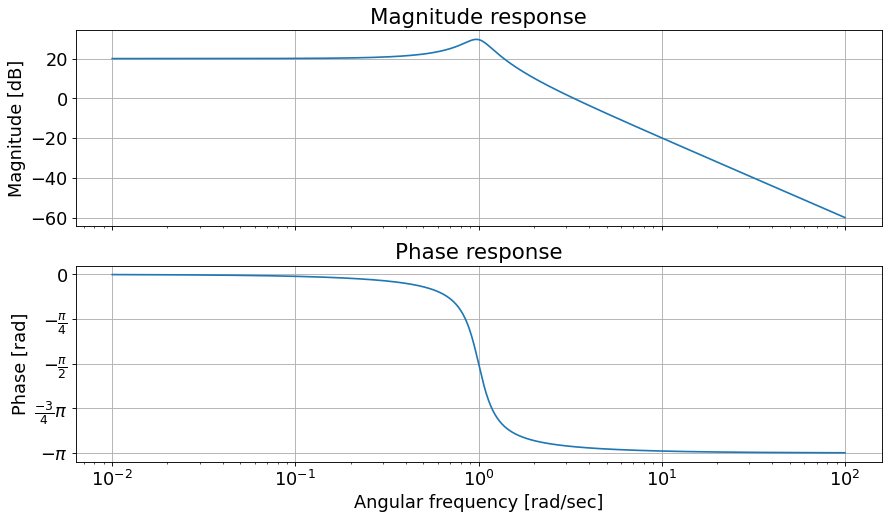

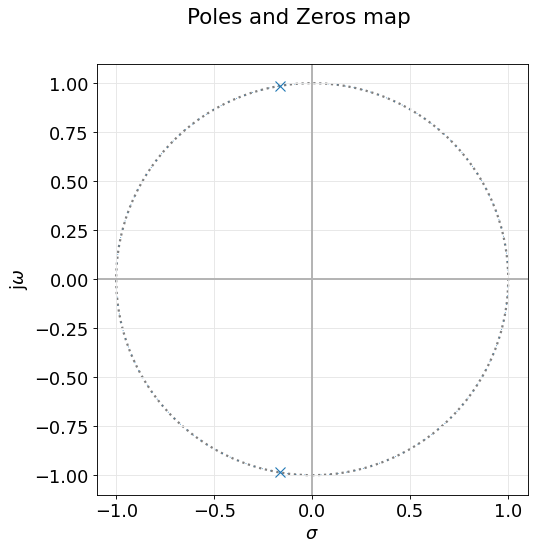

In [20]:
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

plt.sca(axes_hdl[0])
##plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()

## Simulaciones circuitales

### Circuito Ackerberg-Mosberg pasabajos normalizado a $R_3=1$ , $W_0=1$, $Q=3$
#### Esquema eléctrico
<img src="./Selección_031.png" align="center" width="1000" /> 


#### Simulación en frecuencia
<img src="./Selección_032.png" align="center" width="1000" /> 

### Circuito Ackerberg-Mosberg pasabanda normalizado a $R_3=1$ , $\omega_0=1$, $Q=3$
#### Esquema eléctrico
<img src="./Selección_035.png" align="center" width="1000" /> 


#### Simulación en frecuencia
<img src="./Selección_pasband.png" align="center" width="1000" /> 

#### Simulación barrido en frecuencia de $\omega_0$
<img src="./Selección_033.png" align="center" width="1000" /> 

### Circuito Ackerberg-Mosberg pasabajos recalculado a una red de Butterworth
#### Esquema eléctrico
<img src="./Selección_buttr.png" align="center" width="1000" /> 

#### Simulación en frecuencia
<img src="./Selección_butter2.png" align="center" width="1000" /> 
